In [37]:

import warnings
warnings.filterwarnings('ignore')


In [38]:
# Import important library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option("max_columns", None)
pd.set_option("max_rows", 200)

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [4]:
from utils import *

In [5]:
SEED = 8

In [98]:
INPUT_FILE = "concrete_wd_features.csv"
INPUT_DIR = "./"

In [99]:
df = read_input(INPUT_DIR, INPUT_FILE)

In [8]:
df.shape

(1030, 13)

In [100]:
TARGET='strength'

In [101]:
# Separating dependent and independent variables
X = df.drop(TARGET,axis=1)
Y = df[TARGET]

In [10]:
features = X.columns.tolist()

In [11]:
# Splitting the data into train and test
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y , test_size=0.3, random_state=SEED)

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error

In [39]:
grid_search_best_params_ = {'max_depth': 7, 'min_samples_split': 5, 'n_estimators': 100}

In [40]:
rf = RandomForestRegressor(random_state=SEED,
                           n_jobs=-1,
                          **grid_search_best_params_)
rf.fit(X, Y)
rf.score(X, Y)

0.9469624596274088

---------

In [51]:
p_target = f"p_{TARGET}"

In [41]:
df[p_target] = rf.predict(X)

In [71]:
df['error'] = np.abs((df[p_target].values - df[TARGET].values)/df[TARGET].values)

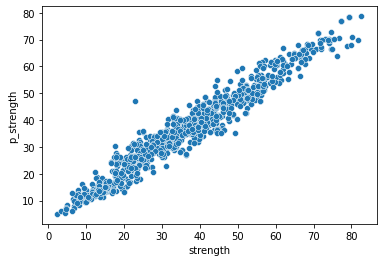

In [44]:
sns.scatterplot(x=TARGET,
           y = p_target,
           data=df)

In [48]:
df['bucket'] = pd.qcut(df[TARGET],
                      q=10,
                      duplicates='drop')

In [72]:
df.groupby(by='bucket')[[p_target,TARGET,'error']].agg(target_mean = (TARGET,'mean'),
                                                   predicted_mean = (p_target,'mean'),
                                                      error = ('error','mean'))

,target_mean,predicted_mean,error
bucket,,,
"(2.329, 14.2]",10.524615,12.444674,0.237633
"(14.2, 20.96]",17.275686,18.378677,0.150616
"(20.96, 25.474]",23.432621,25.934681,0.151305
"(25.474, 30.928]",28.069223,29.308925,0.085173
"(30.928, 34.445]",32.718835,33.879621,0.078938
"(34.445, 39.02]",36.926117,36.652064,0.065554
"(39.02, 43.289]",40.810777,39.624821,0.074759
"(43.289, 50.514]",46.312913,44.783866,0.078515
"(50.514, 58.82]",54.185437,51.908865,0.065596


In [56]:

_df = df[df[TARGET]<=40]
mean_squared_error(_df[TARGET],_df[p_target])


12.678232669400174

In [57]:
_df = df[df[TARGET]>40]
mean_squared_error(_df[TARGET],_df[p_target])

18.410385522484248

In [58]:
mean_squared_error(df[TARGET],df[p_target])

14.787442311457323

In [59]:
from sklearn.linear_model import LinearRegression

In [61]:
lr = LinearRegression()
lr.fit(df[[p_target]],df[TARGET])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [64]:
mean_squared_error(df[TARGET], lr.predict(df[[p_target]]))

14.097620968249766

### Using DT to see the area of problem

In [75]:
dt = DecisionTreeRegressor(max_depth=3)
y = df['error']
X = df[['cement','water']]

In [81]:
dt.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [82]:
from sklearn import tree

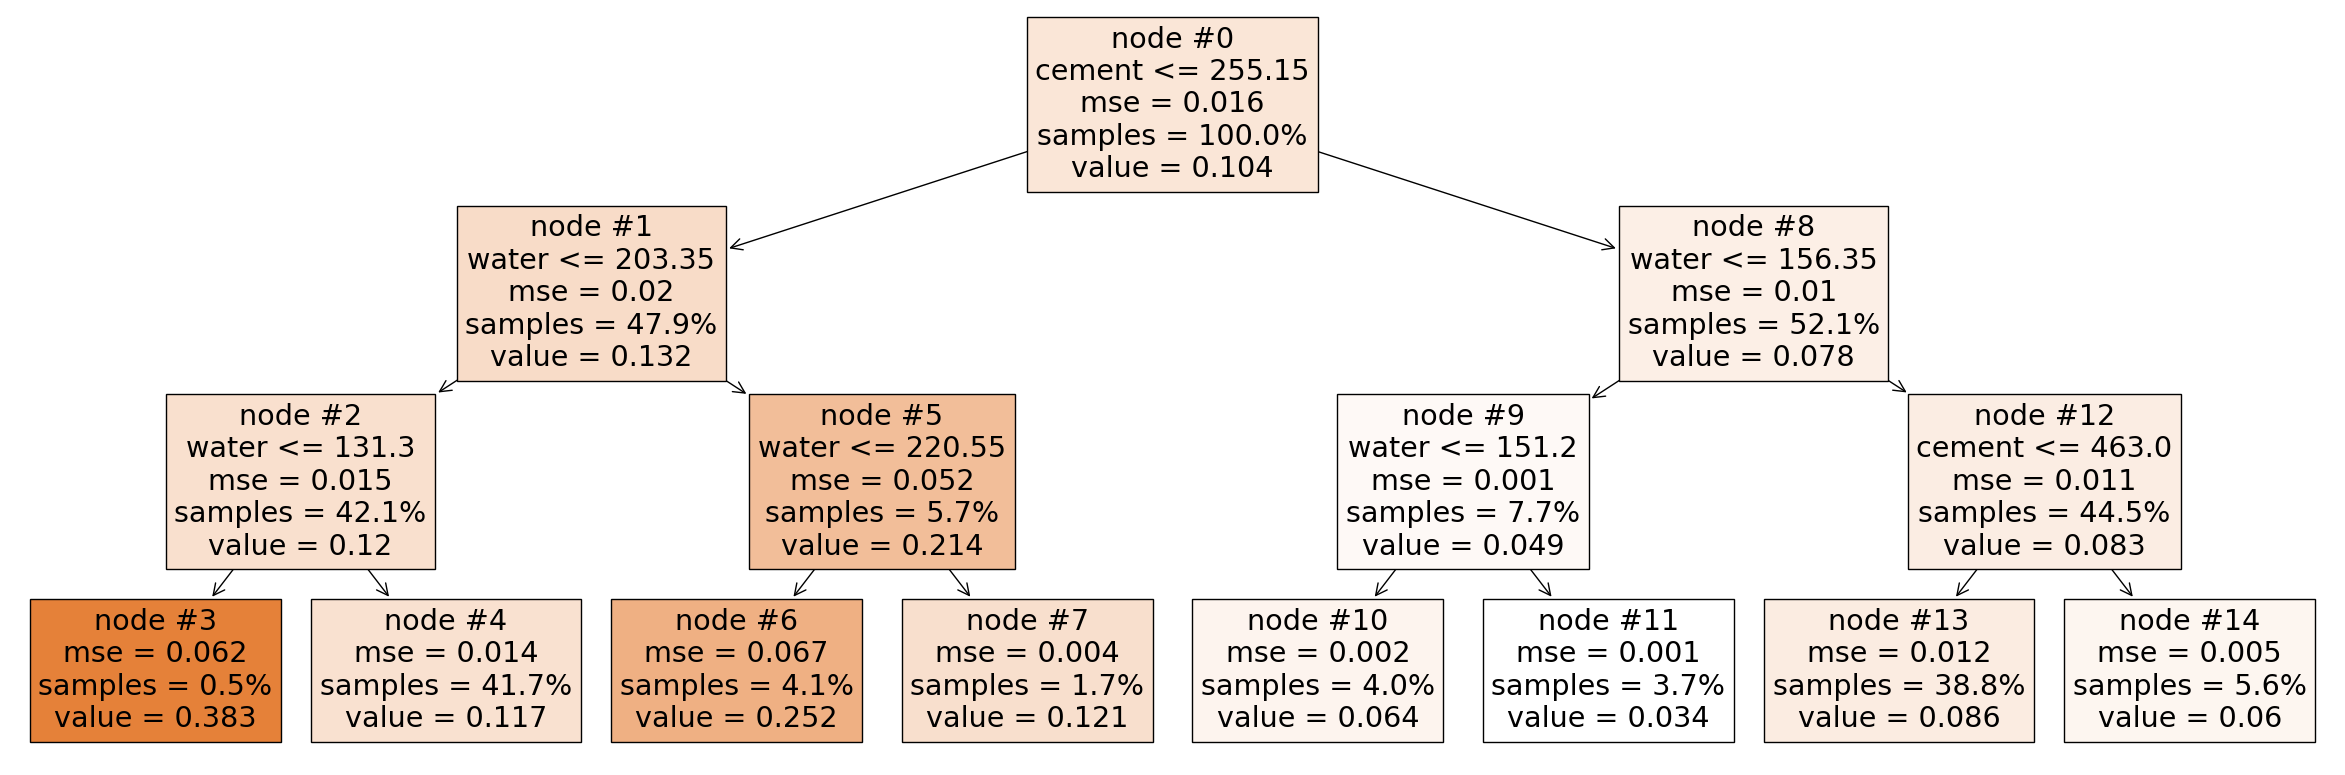

In [84]:
fig, axes = plt.subplots(nrows = 1, ncols = 1,figsize = (30,10), dpi=100)
tree.plot_tree(dt,
               feature_names = X.columns, 
               filled=True,
               node_ids=True,
               proportion=True);

In [ ]:

import warnings
warnings.filterwarnings('ignore')


# Import important library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option("max_columns", None)
pd.set_option("max_rows", 200)

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

from utils import *

SEED = 8

INPUT_FILE = "concrete_wd_features.csv"
INPUT_DIR = "./"

df = read_input(INPUT_DIR, INPUT_FILE)

df.shape

TARGET='strength'

# Separating dependent and independent variables
X = df.drop(TARGET,axis=1)
Y = df[TARGET]

features = X.columns.tolist()

# Splitting the data into train and test
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y , test_size=0.3, random_state=SEED)

from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error

grid_search_best_params_ = {'max_depth': 7, 'min_samples_split': 5, 'n_estimators': 100}

rf = RandomForestRegressor(random_state=SEED,
                           n_jobs=-1,
                          **grid_search_best_params_)
rf.fit(X, Y)
rf.score(X, Y)

---------

p_target = f"p_{TARGET}"

df[p_target] = rf.predict(X)

df['error'] = np.abs((df[p_target].values - df[TARGET].values)/df[TARGET].values)

sns.scatterplot(x=TARGET,
           y = p_target,
           data=df)

df['bucket'] = pd.qcut(df[TARGET],
                      q=10,
                      duplicates='drop')

df.groupby(by='bucket')[[p_target,TARGET,'error']].agg(target_mean = (TARGET,'mean'),
                                                   predicted_mean = (p_target,'mean'),
                                                      error = ('error','mean'))






_df = df[df[TARGET]<=40]
mean_squared_error(_df[TARGET],_df[p_target])


_df = df[df[TARGET]>40]
mean_squared_error(_df[TARGET],_df[p_target])

mean_squared_error(df[TARGET],df[p_target])

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(df[[p_target]],df[TARGET])

mean_squared_error(df[TARGET], lr.predict(df[[p_target]]))

### Using DT to see the area of problem

dt = DecisionTreeRegressor(max_depth=3)
y = df['error']
X = df[['cement','water']]

dt.fit(X, y)

from sklearn import tree

fig, axes = plt.subplots(nrows = 1, ncols = 1,figsize = (30,10), dpi=100)
tree.plot_tree(dt,
               feature_names = X.columns, 
               filled=True,
               node_ids=True,
               proportion=True);